## Description

These are the exported slides used in my presentation on analyzing data with Azure ML Studio and Python. The presentation itself is a gentle introduction to feature analysis and engineering in the context of classification problems. I'm using the Titanic passenger dataset from Kaggle, and exploring how well we can predict the survival of its passengers.

You can also take a look at the three Azure ML Studio experiments below :

* [Initial experiment, with good apperent performance but lots of null predictions](https://gallery.azure.ai/Experiment/Kaggle-Titanic-1-Lots-of-null-predictions)
* [The real performance of the algorithms (the experiment simply assumes that null predictions lived)](https://gallery.azure.ai/Experiment/Kaggle-Titanic-2-Make-everything-okay)
* [After feature engineering](https://gallery.azure.ai/Experiment/Kaggle-Titanic-After-feature-cleaning-and-engineering)



## The Data Science Process

A non-linear, iterative process

1. Ask an interesting question
1. Get the data
1. __Explore the data__
1. Model the data
1. ~~Communicate and visualize results~~ Profit

_Formalized by Joe Blitzstein and Hanspeter Pfister, for the Harvard data science course_

We'll start exploring the data, focusing at the same time on our final goal which is to improve predictions.

1. Ask an interesting question
 * What is the scientific goal?
 * What would you do if you had all the data?
 * What do you want to predict or estimate?
1. Get the data
 * How were the data sampled?
 * Which data are relevant?
 * Are there privacy issues?
1. Explore the data
 * Plot the data
 * Are there anomalies?
 * Are there patterns?
1. Model the data
 * Build a model
 * Fit the model
 * Validate the model
1. Communicate and visualize results
 * What did we learn?
 * Do the results make sense?
 * Can we tell a story?
 
 Also take a look at https://www.kdnuggets.com/2016/03/data-science-process.html

# 1. An interesting question

## Who would survive the Titanic?

<img src="https://i.imgur.com/E0Z8UIp.jpg" width="500px"></img>

# 2. Get Titanic survival data


## 🔗[biostat.mc.vanderbilt.edu/wiki/Main/DataSets](http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets)


## 🔗[kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)


## Understand the dataset's features

In [1]:
# from azureml import Workspace

# ws = Workspace()
# ds = ws.datasets['Kaggle Titanic - Train']
# df = ds.to_dataframe()

import pandas as pd

df = pd.read_csv('./train.csv')

In [2]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## survived - Survival
* 1 = Yes
* 0 = No

## pclass - Ticket class

* 1 = 1st class (Upper class)
* 2 = 2nd class (Middle class)
* 3 = 3rd class (Lower class)

## sex - Sex

male/female

## age - Age in years

Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

## sibsp - number of siblings / spouses aboard the Titanic

The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiances were ignored)

## parch - number of parents / children aboard the Titanic

The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

## ticket - Ticket number

## fare - Passenger fare

## cabin - Cabin number

## embarked	- Port of Embarkation

* C = Cherbourg
* Q = Queenstown
* S = Southampton

## Let's see how well we can answer the interesting question at the moment

## Metrics for evaluating a binary classification model

* __Accuracy__ 
* Precision
* Recall
* F1-Score

__Precision-Recall__ is a useful measure of success of prediction when the classes are very imbalanced.

### Confusion Matrix

||Predicted: Yes |Predicted: No|
|--|
|__Actual: Yes__| True Positive| False Negative|
|__Actual: No__| False Positive| True Negative|


---

Precision = How many selected items are relevant (_how many people from those that we said would survive actually survived_)

Precision = TP / (TP + FP)


---

Recall = How many relevant items are selected (_how many people from those that actually survived we said would survive_)

Recall = TP / (TP + FN)

F-Score = Combines _Precision_ and _Recall_ into a single value

F-Score = 2 \* (Precision \* Recall) / (Precision + Recall)

# Conclusion
## We want to maximize Accuracy, while also taking Precision/Recall into account

## We'll focus on

* Getting an overview of the data
* Handling missing features
* Visualizing features
* Correlating features with the outcome and with themselves

## Onto Azure Machine Learning Studio!

Take a look at the basic version of the experiment on the Cortana Intelligence Gallery [here](https://gallery.cortanaintelligence.com/Experiment/Kaggle-Titanic-1-Lots-of-null-predictions), and notice how many null predictions we get.

Afterwards, take a look [here](https://gallery.cortanaintelligence.com/Experiment/Kaggle-Titanic-2-Make-everything-okay) and see how well the algorithms perform after pretending that all people for which we couldn't predict survival actually lived.

Consider:
* What is Azure ML Studio and how it works
* How the modules are linked
* The algorithms used
* The Train/Score/Evaluate paradigm
* The usage of Select Columns and Add Rows modules
* The Python code
* Visualizing the initial dataset
* How the Edit Metadata module works
* Visualizing the output of the Python modules

## Initial conclusions

* Fix the columns with missing values (Cabin, Age, Embarked)
* We need to ignore the PassengerId and Ticket
* Ignore names but extract titles

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

newplot = lambda width=10,height=5: plt.figure(figsize=(width,height)).gca() 

## Extract Deck from Cabin

In [4]:
df['Deck'] = df['Cabin'].str.extract('(^[A-Z])', expand = True)

df['Deck'].describe()

count     204
unique      8
top         C
freq       59
Name: Deck, dtype: object

In [5]:
df['Deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

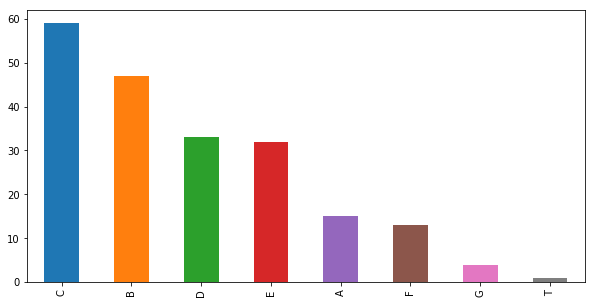

In [6]:
df['Deck'].value_counts().plot.bar(ax = newplot())

In [7]:
df['Deck'].fillna('X', inplace=True)
df['Deck'].value_counts()

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

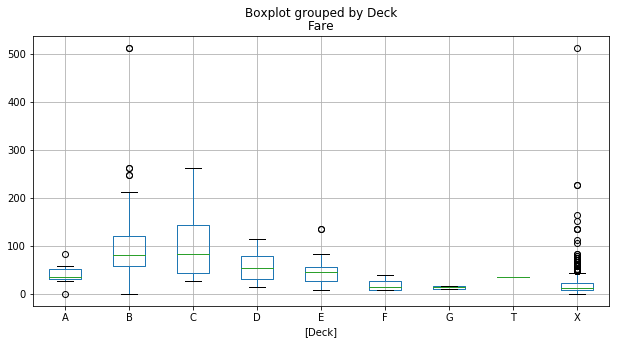

In [8]:
df[['Fare', 'Deck']].boxplot(by='Deck', ax=newplot())

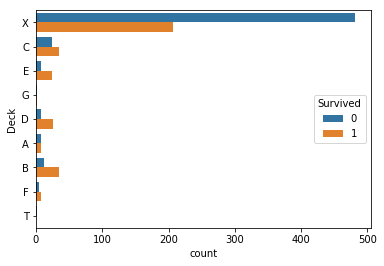

In [9]:
sns.countplot(y='Deck', hue='Survived', data=df)

## Analyze Age

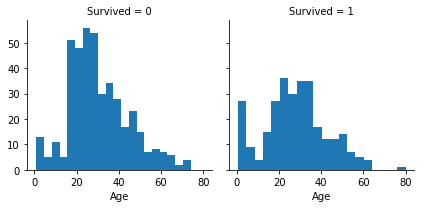

In [10]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

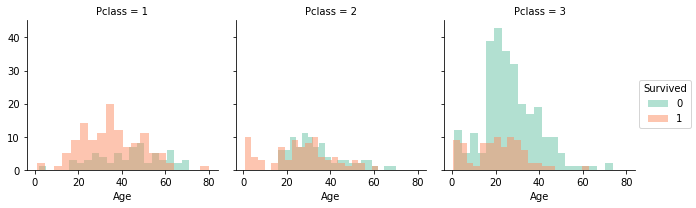

In [11]:
g = sns.FacetGrid(df, col='Pclass', hue='Survived', palette='Set2')

g.map(plt.hist, 'Age', alpha=.5, bins=20)
g.add_legend();

## Apply MICE (Multiple Imputation by Chained Equations) to fill in missing Age values

## Fill in Embark

In [12]:
df[df['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked Deck  
61   female  38.0      0      0  113572  80.0   B28      NaN    B  
829  female  62.0      0      0  113572  80.0   B28      NaN    B

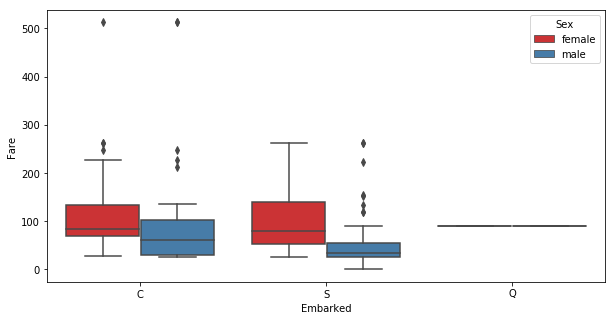

In [13]:
sns.boxplot(x='Embarked', y='Fare', hue='Sex', data=df[df['Pclass'] == 1], palette='Set1', ax=newplot())

In [14]:
df.groupby(['Sex', 'Pclass', 'Embarked'])['Fare'].median()

Sex     Pclass  Embarked
female  1       C           83.1583
                Q           90.0000
                S           79.6500
        2       C           24.0000
                Q           12.3500
                S           23.0000
        3       C           14.4583
                Q            7.7500
                S           14.4500
male    1       C           61.6792
                Q           90.0000
                S           35.0000
        2       C           25.8604
                Q           12.3500
                S           13.0000
        3       C            7.2292
                Q            7.7500
                S            8.0500
Name: Fare, dtype: float64

In [15]:
df['Embarked'].fillna('S', inplace=True)

## Extract Title from Name

In [16]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)

pd.crosstab(df['Sex'], df['Title'])

pd.crosstab(df['Survived'], df['Title'])

Title   Capt  Col  Countess  Don  Dr  Jonkheer  Lady  Major  Master  Miss  \
Sex                                                                         
female     0    0         1    0   1         0     1      0       0   182   
male       1    2         0    1   6         1     0      2      40     0   

Title   Mlle  Mme   Mr  Mrs  Ms  Rev  Sir  
Sex                                        
female     2    1    0  125   1    0    0  
male       0    0  517    0   0    6    1

Title     Capt  Col  Countess  Don  Dr  Jonkheer  Lady  Major  Master  Miss  \
Survived                                                                      
0            1    1         0    1   4         1     0      1      17    55   
1            0    1         1    0   3         0     1      1      23   127   

Title     Mlle  Mme   Mr  Mrs  Ms  Rev  Sir  
Survived                                     
0            0    0  436   26   0    6    0  
1            2    1   81   99   1    0    1

In [17]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 
                                            'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

pd.crosstab(df['Sex'], df['Title'])

pd.crosstab(df['Survived'], df['Title'])

Title   Master  Miss   Mr  Mrs  Rare
Sex                                 
female       0   185    0  126     3
male        40     0  517    0    20

Title     Master  Miss   Mr  Mrs  Rare
Survived                              
0             17    55  436   26    15
1             23   130   81  100     8

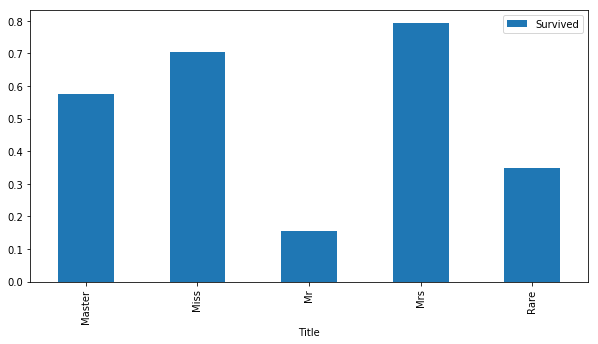

In [18]:
df[['Title', 'Survived']].groupby('Title').mean().plot.bar(ax=newplot())

## Combine SibSp and Parch into a single feature

In [19]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked Deck Title  \
886    male  27.0      0      0      211536  13.00   NaN        S    X  Rare   
887  female  19.0      0      0      112053  30.00   B42        S    B  Miss   
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S    X  Miss   
889    male  26.0      0      0      111369  30.00  C148        C    C    Mr   
890    male  32.0      0      0      370376   7.75   NaN        Q    X    Mr   

     FamilySize  
886           1  
887           1  
888           4  
889           1  
890           1

In [20]:
df.groupby(['FamilySize'])['Survived'].mean()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

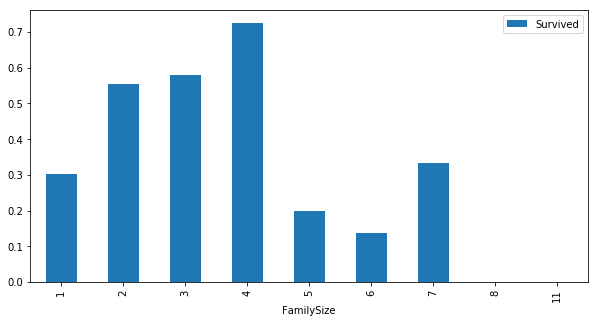

In [21]:
df.groupby(['FamilySize'], as_index=False)['Survived'].mean()\
    .plot.bar(x='FamilySize', ax=newplot())

## Drop unnecessary columns

In [22]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'],\
        axis=1, inplace=True)

df.head()

Survived  Pclass     Sex   Age     Fare Embarked Deck Title  FamilySize
0         0       3    male  22.0   7.2500        S    X    Mr           2
1         1       1  female  38.0  71.2833        C    C   Mrs           2
2         1       3  female  26.0   7.9250        S    X  Miss           1
3         1       1  female  35.0  53.1000        S    C   Mrs           2
4         0       3    male  35.0   8.0500        S    X    Mr           1

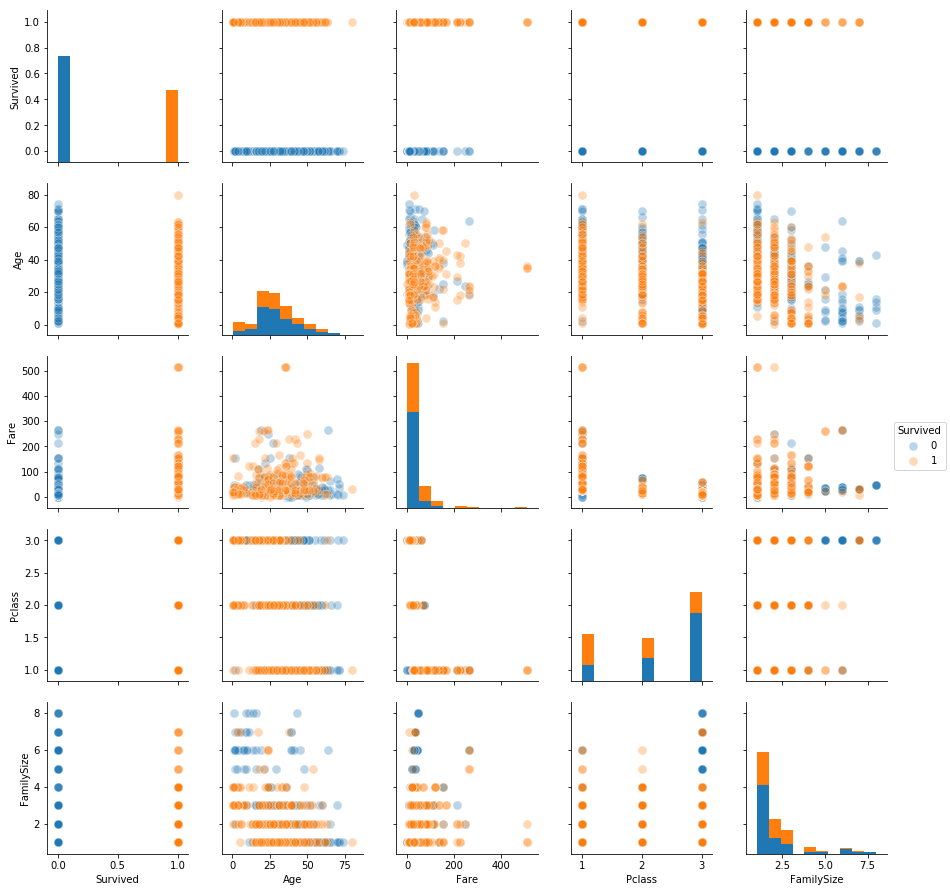

In [23]:

sns.pairplot(df.dropna()[['Survived', 'Age', 'Fare', 'Pclass', 'FamilySize', 'Title', 'Deck']], hue='Survived', plot_kws={'alpha':0.3, 's':80})

## While focusing on

* Correlating features with the outcome and with themselves
 * Consider the features that contribute the most to the prediction target, and the ones that are autocorrelated
* Handling missing features
 * Know that most algorithms don't handle missing values well, so we should either will them ourselves, or drop the features/rows.
* Checking for errors and outliers 
 * Outliers will influence the model, same with erroneous values - these should be scrubbed from the dataset.
* Visualizing features
 * Visualizing always helps understand the data better, keep in mind the prediction target and visualize accordingly.

## Let's try out the [improved dataset](https://gallery.cortanaintelligence.com/Experiment/Kaggle-Titanic-After-feature-cleaning-and-engineering)!

## Further Reading

* [kaggle.com/c/titanic](http://kaggle.com/c/titanic)
* [pandas.pydata.org/pandas-docs/stable/visualization.html](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
* [unofficialgoogledatascience.com/2016/10/practical-advice-for-analysis-of-large.html](http://www.unofficialgoogledatascience.com/2016/10/practical-advice-for-analysis-of-large.html)
* [edx.org/course/data-science-essentials-microsoft-dat203-1x-5](https://www.edx.org/course/data-science-essentials-microsoft-dat203-1x-5)
* [docs.microsoft.com/en-us/azure/machine-learning/studio/evaluate-model-performance](https://docs.microsoft.com/en-us/azure/machine-learning/studio/evaluate-model-performance)
* [docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/python-data-access](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/python-data-access)
